In [2]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df=pd.read_csv(r"C:\Users\CONSULTOR\Documents\VS\Project\Social Media Users.csv")
df.head(3)

,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13


In [5]:
pd.DataFrame({'Columnas': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'Duplicados count':df.duplicated().sum()})
            

,Columnas,dtypes,NaN count,Duplicados count
0,Platform,object,0,0
1,Owner,object,0,0
2,Primary Usage,object,0,0
3,Country,object,0,0
4,Daily Time Spent (min),float64,0,0
5,Verified Account,object,0,0
6,Date Joined,object,0,0


In [6]:
#df.dropna() #ELIMINAR DATOS FALTANTES
#df.fillna() #RELLENAR VALORES FALTANTES
#df.drop_duplicates() #ELIMINAR DUPLICADOS

In [7]:
df["Date Joined"] = pd.to_datetime(df["Date Joined"])
df.head(3)


,Platform,Owner,Primary Usage,Country,Daily Time Spent (min),Verified Account,Date Joined
0,WhatsApp,Meta,Messaging,Switzerland,113.94,Yes,2019-03-03
1,WeChat,Tencent,Messaging and social media,Madagascar,49.63,Yes,2023-09-21
2,Snapchat,Snap Inc.,Multimedia messaging,Pitcairn Islands,29.01,Yes,2020-12-13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Platform                10000 non-null  object        
 1   Owner                   10000 non-null  object        
 2   Primary Usage           10000 non-null  object        
 3   Country                 10000 non-null  object        
 4   Daily Time Spent (min)  10000 non-null  float64       
 5   Verified Account        10000 non-null  object        
 6   Date Joined             10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 547.0+ KB


In [9]:
df.shape

(10000, 7)

ANALISIS EXPLORATORIO


In [10]:
#DESCRIPCION DEL DATAFRAME
print(f"Descripcion de los datos: \n{df.describe()}\n")


Descripcion de los datos: 
       Daily Time Spent (min)          Date Joined
count            10000.000000                10000
mean               152.211145  2020-04-27 01:55:12
min                  5.020000  2015-05-04 00:00:00
25%                 78.920000  2017-10-25 00:00:00
50%                152.735000  2020-04-22 00:00:00
75%                225.642500  2022-10-20 06:00:00
max                300.000000  2025-05-03 00:00:00
std                 85.142750                  NaN



In [11]:
#Conteo por plataforma
pd.DataFrame({"Cantidad": df.groupby("Platform").size()})
              


,Cantidad
Platform,
Facebook,709
Instagram,745
LinkedIn,710
Pinterest,704
Quora,695
Reddit,764
Snapchat,701
Telegram,696
Threads,724


In [12]:
pd.DataFrame({"Cantidad": df.groupby("Primary Usage").size()})
              

,Cantidad
Primary Usage,
Discussion forums and communities,764
Messaging,1375
Messaging and social media,742
Microblogging,706
Multimedia messaging,701
Photo and video sharing,745
Professional networking,710
Q&A knowledge sharing,695
Short-form videos,716


In [13]:
pd.DataFrame({"Cantidad": df.groupby("Country").size()})

,Cantidad
Country,
Afghanistan,44
Albania,40
Algeria,37
American Samoa,46
Andorra,39
...,...
Wallis and Futuna,39
Western Sahara,37
Yemen,40


Text(0.5, 1.0, 'Histograma: mu152.211145, sigma 85.14274960911278')

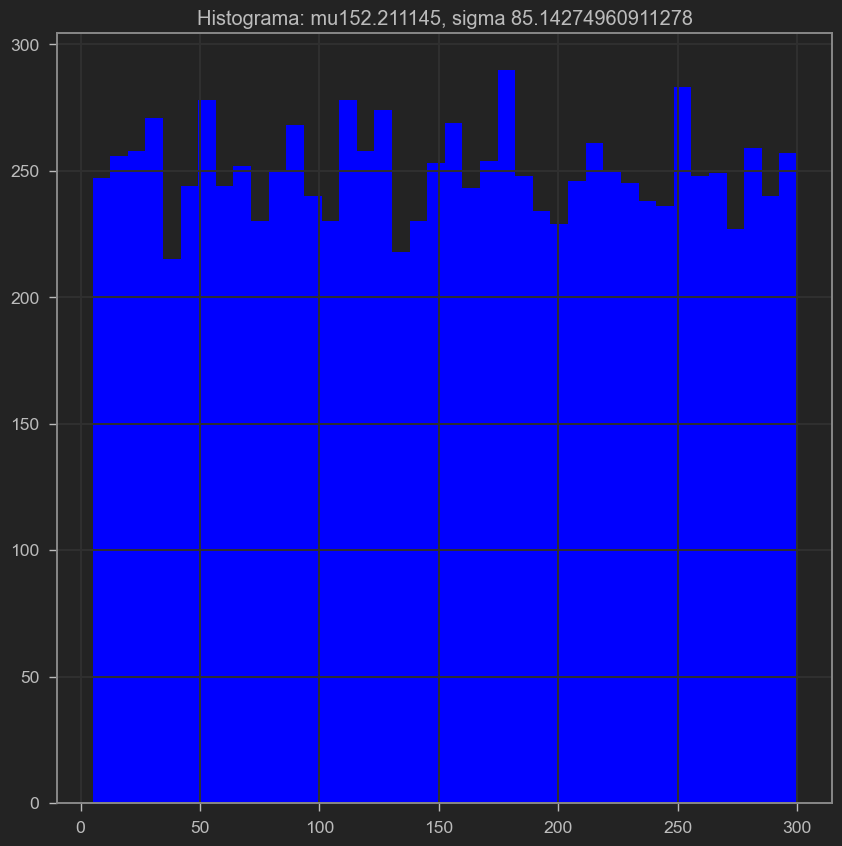

In [14]:
num_bins = 40
mu = df["Daily Time Spent (min)"].mean()
sigma  = df["Daily Time Spent (min)"].std()
plt.figure(figsize=(10,10))
plt.grid()

plt.hist(df["Daily Time Spent (min)"],num_bins, facecolor = "blue")

plt.title("Histograma: mu" + str(mu)+ ", sigma " + str(sigma))



In [15]:
print("Top 3 de paises por plataforma")
df_sorted = df.sort_values(by="Daily Time Spent (min)", ascending=False)

top_3_por_plataforma = (
    df_sorted.groupby("Platform")
    .head(3)
    .groupby("Platform")["Country"]
    .apply(list)
    .reset_index(name="Top 3 Países")
)

top_3_por_plataforma



Top 3 de paises por plataforma


,Platform,Top 3 Países
0,Facebook,"[Bosnia and Herzegovina, Turkey, Ukraine]"
1,Instagram,"[Lesotho, Yemen, Slovenia]"
2,LinkedIn,"[Faroe Islands, Guadeloupe, Lao People's Democ..."
3,Pinterest,"[Niger, Malawi, French Southern Territories]"
4,Quora,"[Tajikistan, Monaco, Lao People's Democratic R..."
5,Reddit,"[Cameroon, Guatemala, Mayotte]"
6,Snapchat,"[Ireland, Tunisia, Colombia]"
7,Telegram,"[Mongolia, Trinidad and Tobago, Kuwait]"
8,Threads,"[Malawi, Serbia, Netherlands]"
9,TikTok,"[Holy See (Vatican City State), Equatorial Gui..."


Cuanta gente verifica la cuenta de acuerdo a la plataforma


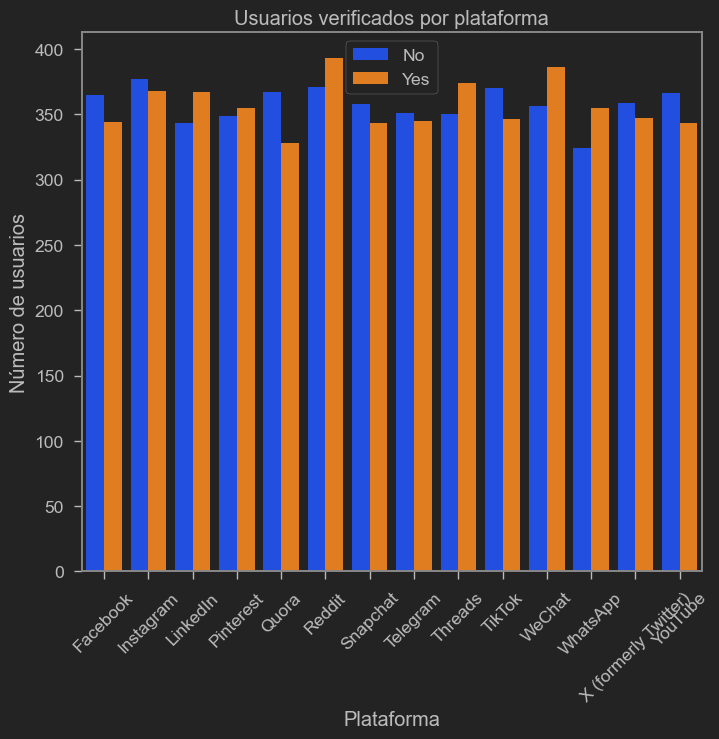

In [27]:
print("Cuanta gente verifica la cuenta de acuerdo a la plataforma")
conteo = df.groupby(["Platform", "Verified Account"]).size().reset_index(name="count")

plt.Figure(figsize=(15,6))
sns.barplot(data=conteo, x="Platform", y="count", hue="Verified Account",palette="bright")
plt.title("Usuarios verificados por plataforma")
plt.ylabel("Número de usuarios")
plt.xlabel("Plataforma")
plt.xticks(rotation=45)
plt.legend(loc="upper center")
plt.show()


Redes sociales como Reddit, WeChat y Threads presentan el mayor numero de usuarios con su cuenta verificada, esto puede indicar que la verificacion es mas sencilla o rapida a comparacion de aplicaciones como Instagram, Youtube y Tiktok que presentan el mayor numero de cuentas verificadas. Otro punto importante que se observa es que los valores de cuentas verificadas son similares a la de las cuentas no verificadas.

In [33]:
df.groupby(["Primary Usage","Platform"]).size()

Primary Usage                      Platform            
Discussion forums and communities  Reddit                  764
Messaging                          Telegram                696
                                   WhatsApp                679
Messaging and social media         WeChat                  742
Microblogging                      X (formerly Twitter)    706
Multimedia messaging               Snapchat                701
Photo and video sharing            Instagram               745
Professional networking            LinkedIn                710
Q&A knowledge sharing              Quora                   695
Short-form videos                  TikTok                  716
Social networking                  Facebook                709
Text-based social networking       Threads                 724
Video sharing                      YouTube                 709
Visual discovery and bookmarking   Pinterest               704
dtype: int64

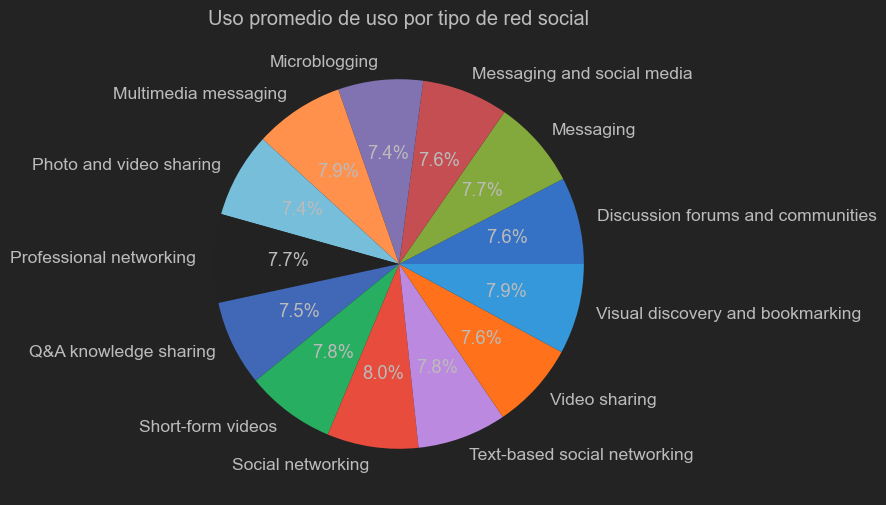

In [31]:
promedio=df.groupby("Primary Usage")["Daily Time Spent (min)"].mean()
plt.figure(figsize=(8,6))
plt.pie(promedio, labels=promedio.index, autopct="%1.1f%%")
plt.title("Uso promedio de uso por tipo de red social")
plt.show()

Categoría con mayor uso:
La categoría con el mayor porcentaje es “Social networking” con 8.0%.

Categorías con menor uso:
Las categorías con el menor porcentaje son “Microblogging” y “Photo and video sharing”, ambas con 7.4%.

Distribución general:
La mayoría de las categorías (8 de 12) se encuentran entre 7.6% y 7.9%, lo que indica que el uso promedio entre los distintos tipos de redes sociales es bastante homogéneo. Ninguna categoría destaca significativamente, excepto “Social networking”.

Categorías destacadas:

Contenido visual y video: Las categorías relacionadas con imagen y video —“Visual discovery and bookmarking” (7.9%), “Video sharing” (7.6%), “Short-form videos” (7.8%), “Photo and video sharing” (7.4%)— suman un total considerable, mostrando que el contenido visual sigue siendo un motor importante del uso de redes sociales.

Mensajería: “Messaging” (7.7%) y “Messaging and social media” (7.6%) tienen porcentajes altos, resaltando la relevancia de la comunicación directa y privada.

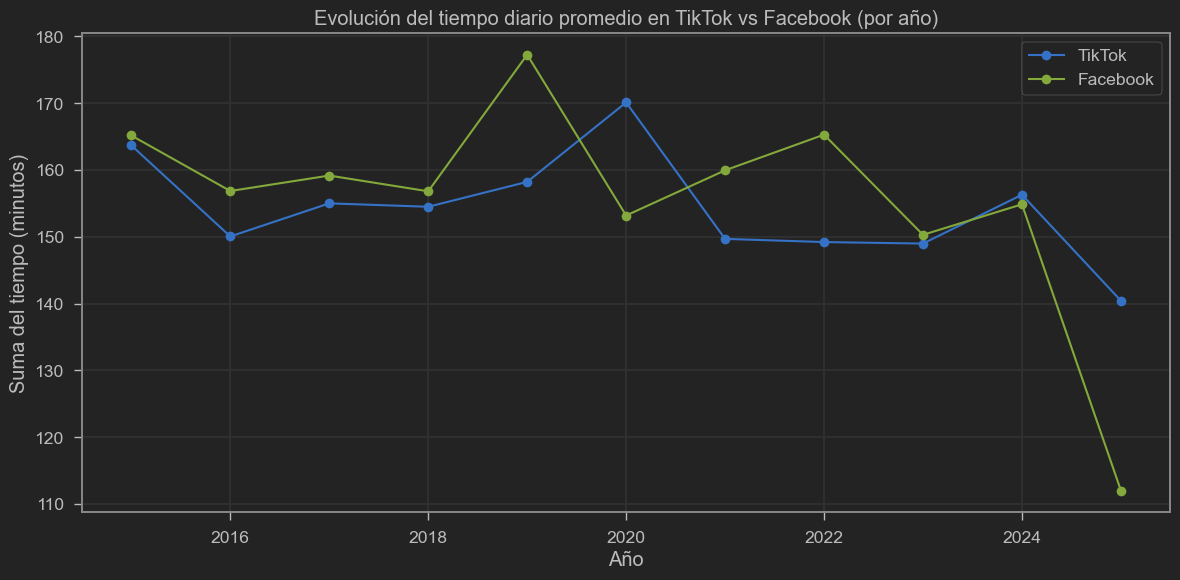

In [18]:
df["Year"] = df["Date Joined"].dt.year
df_filtered = df[df["Platform"].isin(["TikTok", "Facebook"])].copy()

trend_data = df_filtered.groupby(["Year", "Platform"])["Daily Time Spent (min)"].mean().reset_index()
plt.figure(figsize=(12, 6))

for platform in ["TikTok", "Facebook"]:
    subset = trend_data[trend_data["Platform"] == platform]
    plt.plot(subset["Year"], subset["Daily Time Spent (min)"], marker='o', label=platform)

plt.title("Evolución del tiempo diario promedio en TikTok vs Facebook (por año)")
plt.xlabel("Año")
plt.ylabel("Suma del tiempo (minutos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Facebook: Comenzó con uso alto (aproximadamente 165 min/día) y tuvo un pico en 2019 (aproximadamente 178 min/día). De 2020 a 2023, muestra un descenso gradual (aproximadamente 150-155 min/día). En 2025, cae drásticamente a aproximadamente 112 min/día, indicando pérdida de engagement, competencia con TikTok y cambios en el comportamiento de usuarios. 
TikTok: Aparece desde 2016 (aproximadamente 150 min/día) y crece rápidamente hasta 2020 (aproximadamente 170 min/día). Se estabiliza entre 148 y 158 min/día hasta 2025, con un leve descenso (aproximadamente 140 min/día). Compite directamente con Facebook, superándolo brevemente en 2020. 
Comparación: 2015–2018: Facebook domina. 2019–2020: TikTok se acerca y lo supera momentáneamente. 2021–2024: Ambas plataformas empatadas, con ligera ventaja para Facebook. 2025: Caída en ambas, pero más pronunciada en Facebook, sugiriendo que TikTok podría consolidarse como la plataforma líder en tiempo de uso. 
Tendencias clave: TikTok desafía la hegemonía de Facebook en consumo de contenido corto. Disminución general en 2025 podría reflejar menor tiempo en redes sociales o migración a otras apps (Instagram Reels, YouTube Shorts).

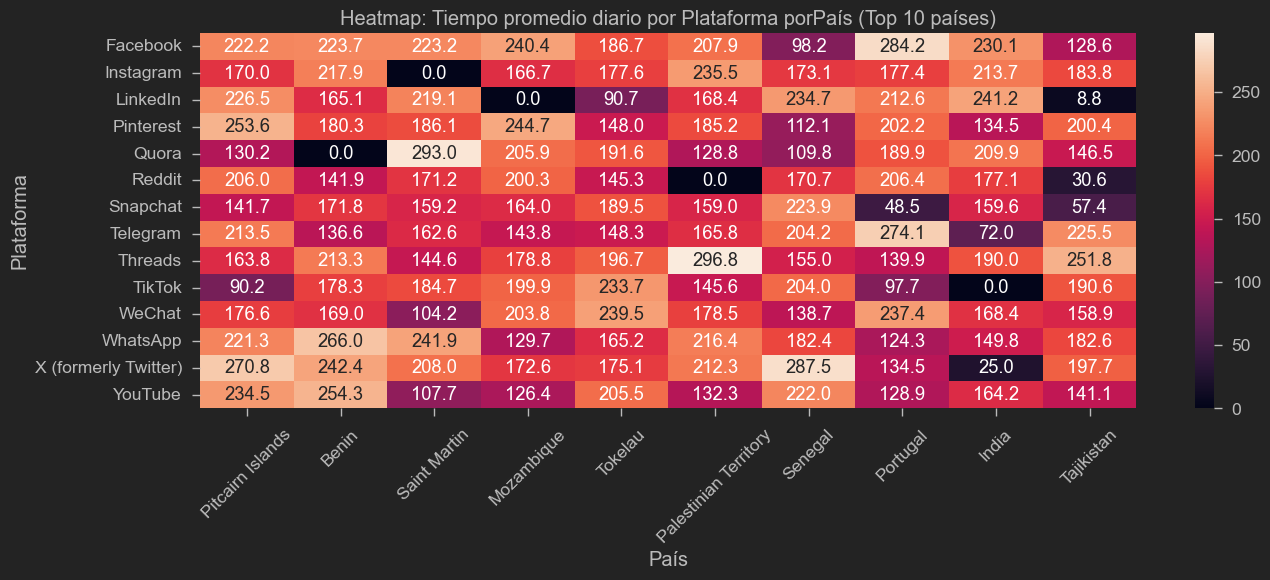

In [19]:

heatmap_data = df.groupby(["Platform", "Country"])["Daily Time Spent (min)"].mean().unstack(fill_value=0)

avg_by_country = df.groupby("Country")["Daily Time Spent (min)"].mean().sort_values(ascending=False)
top_countries = avg_by_country.head(10).index  


heatmap_data_filtered = heatmap_data[top_countries]
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_filtered, annot=True, fmt=".1f")
plt.title("Heatmap: Tiempo promedio diario por Plataforma porPaís (Top 10 países)")
plt.xlabel("País")
plt.ylabel("Plataforma")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Plataformas con mayor tiempo promedio:
X (formerly Twitter), Threads, Telegram y Facebook destacan con valores altos en varios países, superando los 250 minutos en algunos casos.

Plataformas con menor tiempo promedio:
TikTok, Reddit, Quora y instagram muestran algunos valores bajos (incluso 0 en ciertos países), indicando que su uso no es uniforme.

Países con mayor actividad:
Algunos países como Portugal, Benin y Tokelau presentan picos altos de tiempo promedio en varias plataformas.

Tendencia general:
Hay gran variabilidad entre plataformas y países: algunas plataformas son extremadamente populares en ciertos países mientras que otras prácticamente no se usan. Esto indica que el comportamiento de uso de redes sociales es muy dependiente del país y de la plataforma.

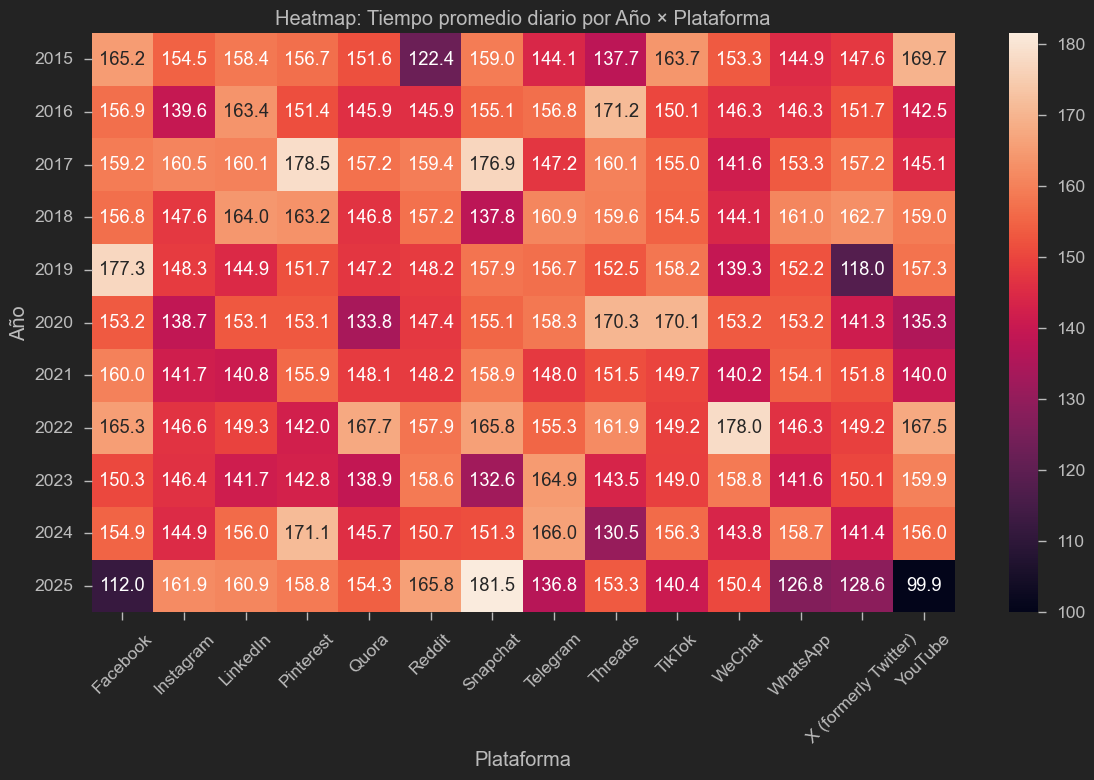

In [20]:

heatmap_year_platform = df.groupby(["Year", "Platform"])["Daily Time Spent (min)"].mean().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_year_platform, annot=True, fmt=".1f")
plt.title("Heatmap: Tiempo promedio diario por Año × Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Año")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Facebook: Uso alto al inicio (2015-2019) con pico en 2019 (~177 min/día), luego caída notable a 112 min/día en 2025.

Instagram, TikTok y Reddit: Muestran aumento o estabilidad, con Instagram creciendo especialmente hasta 2025 (~162 min/día) y TikTok con un pico en 2022 (~178 min/día).

YouTube: Constante alrededor de 140-170 min/día hasta una caída drástica en 2025 (~100 min/día).

WhatsApp y WeChat: Relativamente estables, con pequeños altibajos.

Snapchat y Telegram: Snapchat muestra pico en 2025 (~182 min/día), mientras que Telegram es más estable.

Tendencia general:

Algunas redes clásicas como Facebook y YouTube pierden reciente.

TikTok, Instagram y Reddit mantienen o incrementan el uso.

Plataformas de mensajería y comunicación se mantienen estables.